# Exploratory Data Analysis 

# ON Insurance Claim Prediction Using Logistic Regression 

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-processing**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Preparation**](#Section74)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---
- Logistic regression is a techinque used for solving the __classification problem__.
- Insurance claim prediction is the process of using data analytics and machine learning techniques to forecast the likelihood and severity of future insurance claims. By analyzing historical data.
 

---
<a name = Section1></a>
# **2. Problume statment**

- Ultimately, insurance claim prediction contributes to more accurate risk assessment and more efficient allocation of resources within the insurance industry.
-Insurance companies can better anticipate potential risks and adjust their pricing, underwriting, and risk management strategies accordingly. This predictive modeling helps insurers optimize their operations, improve customer service, and mitigate financial losses by identifying high-risk policies or customers early on. 

---
<a name = Section2></a>
# 3. Installing & Importing Libraries

In [105]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

## 4. Data Acquisition & Description

In [92]:
data =pd.read_csv('C:/Users/Abhishek/Downloads/insurance.csv')

- The dataset consists of the information about people Insurance Claim . Various variables present in the dataset includes data of age, sex,BMI, etc. 
- The dataset comprises of __1338 observations of 8 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                                                       | 
| Age           | Age of Person                                             |   
| Sex           | Sex of Person( Male, Female)                                            |
| BMI           | Body mass index (BMI) of a person's                       |
| Children      | Number of  children                                       |
| Smoker        | A smoker is a person who smokes cigarettes                |
| Region        | Person belongs to particular region                       |
| Charges       | Price of Insurance                                        |


## 5. Data Pre-Profiling

In [111]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90000,0,1,3,16884.92400,1
1,18,1,33.77000,1,0,2,1725.55230,1
2,28,1,33.00000,3,0,2,4449.46200,0
3,33,1,22.70500,0,0,1,21984.47061,0
4,32,1,28.88000,0,0,1,3866.85520,1
5,31,0,25.74000,0,0,2,3756.62160,0
6,46,0,33.44000,1,0,2,8240.58960,1
7,37,0,27.74000,3,0,1,7281.50560,0
8,37,1,29.83000,2,0,0,6406.41070,0
9,60,0,25.84000,0,0,1,28923.13692,0


In [94]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.00000,1338.00000,1338.00000,1338.00000,1338.00000,1338.00000,1338.00000,1338.00000
mean,39.20703,0.50523,30.66340,1.09492,0.20478,1.51570,13270.42227,0.58520
std,14.04996,0.50016,6.09819,1.20549,0.40369,1.10488,12110.01124,0.49287
min,18.00000,0.00000,15.96000,0.00000,0.00000,0.00000,1121.87390,0.00000
25%,27.00000,0.00000,26.29625,0.00000,0.00000,1.00000,4740.28715,0.00000
50%,39.00000,1.00000,30.40000,1.00000,0.00000,2.00000,9382.03300,1.00000
75%,51.00000,1.00000,34.69375,2.00000,0.00000,2.00000,16639.91251,1.00000
max,64.00000,1.00000,53.13000,5.00000,1.00000,3.00000,63770.42801,1.00000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [96]:
data.shape

(1338, 8)

In [97]:
data.skew()

age               0.05567
sex              -0.02095
bmi               0.28405
children          0.93838
smoker            1.46477
region           -0.03810
charges           1.51588
insuranceclaim   -0.34625
dtype: float64

# Check Null Values

In [98]:
null_frame = pd.DataFrame(index=data.columns.values)
null_frame['Null Frequency']=data.isnull().sum().values
percent=data.isnull().sum().values/data.shape[0]
null_frame["Missing%"]=np.round(percent,decimals=4)*100
null_frame.transpose()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Missing%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


**Observation:**
- This dataset contains 1338 rows and 8 columns
- There are ** No null values present**
- **Each feature** seems to have **correct data type**
- The **average** age of the people is about 39 years.
- **Minimum** age seems to be 18 years. Where, the **Max** age was 64.
- The **average Charges** was 13270
- **Minimum** charges seems to be 1338. Where, the **Max** charges is 63770 indicates its skewed.


---
<a name = Section8></a>
# **6. Exploratory Data Analysis**
---

-By conducting thorough data analysis, one can observe patterns in insurance claims across different age groups, cultural backgrounds, and genders.

## Analyzing the Frequency of Insurance Claims:

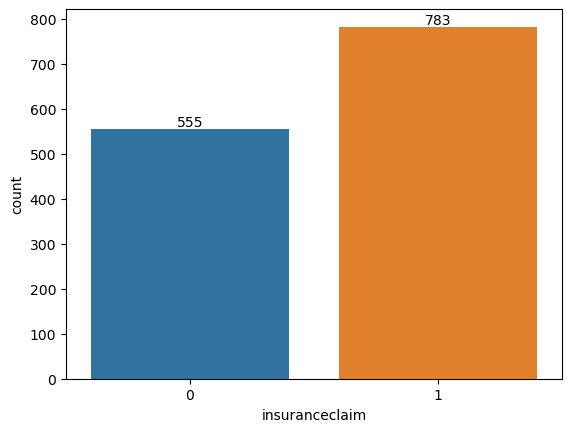

In [99]:
insuranceclaim = sns.countplot(x = 'insuranceclaim',data = data)

for bars in insuranceclaim.containers:
    insuranceclaim.bar_label(bars)

**Observation:**

- We can **observe** 778 people clamed.


## Gender Distribution: Analyzing the Count of Genders

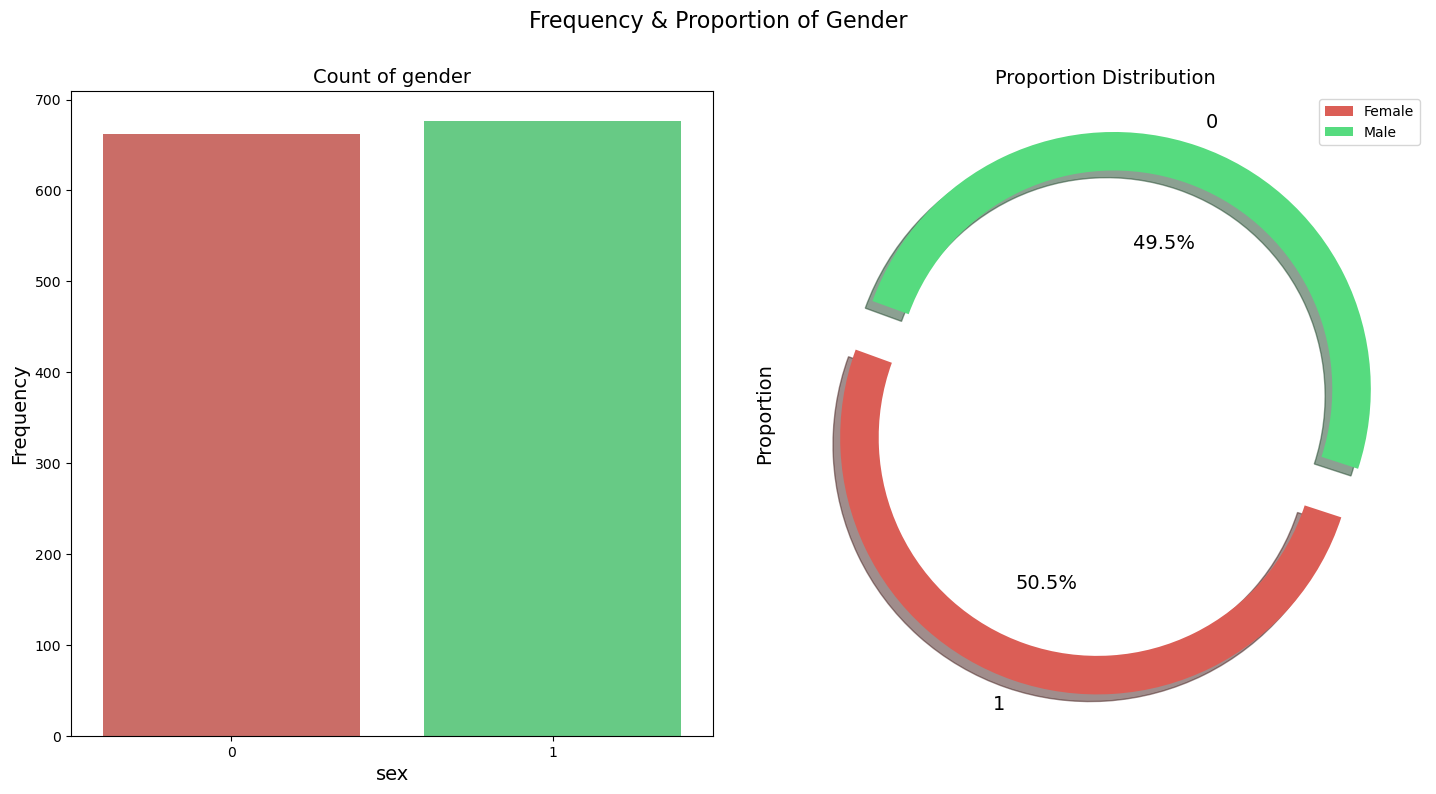

In [110]:
fig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'sex', data = data, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'sex', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Count of gender', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
data['sex'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#DB5E56','#56DB7F'])
plt.legend(['Female', 'Male'])
plt.ylabel(ylabel = 'Proportion', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Gender', y = 1.02, size = 16)
plt.show()

**Observation:**

- The count of males and females is nearly equal.

##   Count of Age Segments

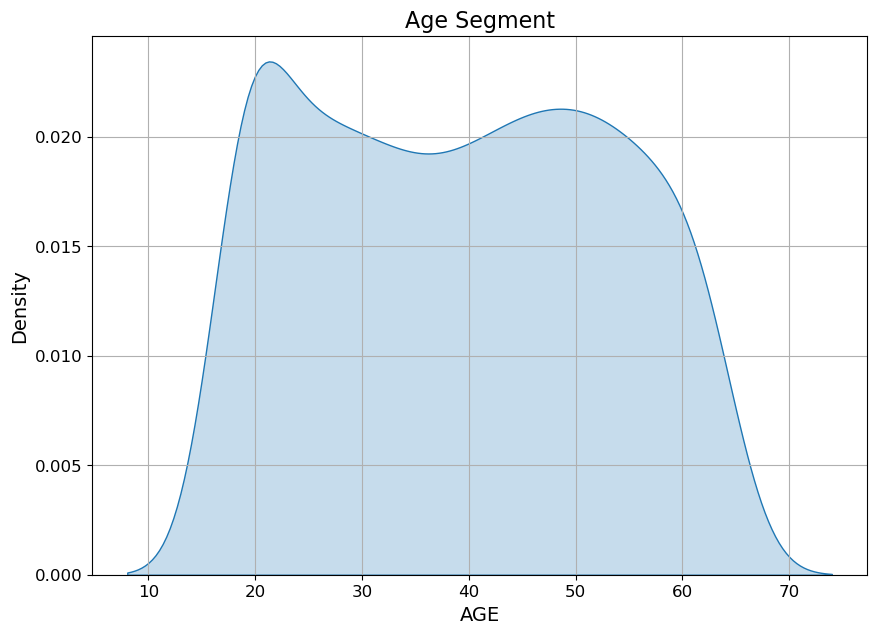

In [11]:
  fig = plt.figure(figsize=(10, 7))

  sns.kdeplot(x = (data['age']), shade=True)

  plt.xlabel(xlabel='AGE', size=14)
  plt.ylabel(ylabel='Density', size=14)
  plt.xticks(size=12)
  plt.yticks(size=12)
  plt.title(label='Age Segment', size=16)

  # Put a grid
  plt.grid(b=True)

  # Display the plot
  plt.show()

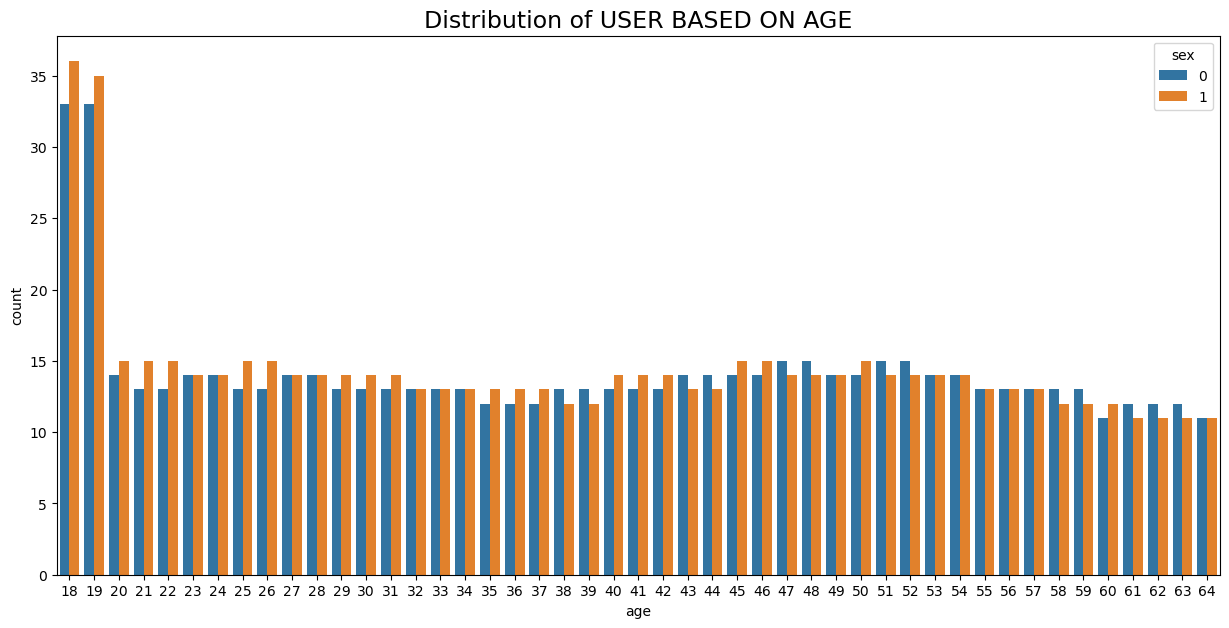

In [12]:
figure=plt.figure(figsize=[15,7])
sns.countplot(data=data, x="age", hue="sex")
plt.title("Distribution of USER BASED ON AGE",size=17)
plt.show()

**Observation:**

- Minimum age seems to be 18 years. Where, the Max age was 64.

## Analyzing the Count of Smokers

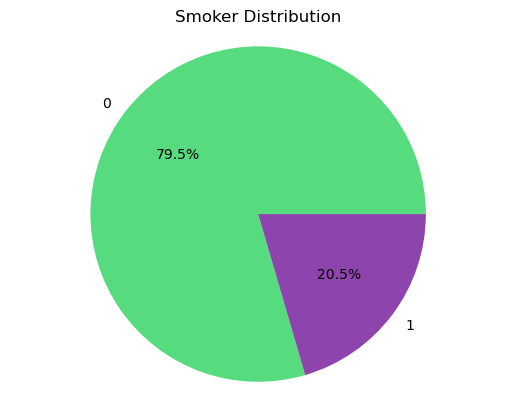

In [31]:
plt.title('Smoker Distribution')
smoker_count = data['smoker'].value_counts()
plt.pie(smoker_count, labels=smoker_count.index, autopct='%.1f%%',colors = ['#56DB7F','#8e44ad'])
plt.axis('equal')
plt.show()


**Observation:**

- We can **observe** 20.5% people are smoker.
 

## Is there any association between Age and Clame?</h4>**

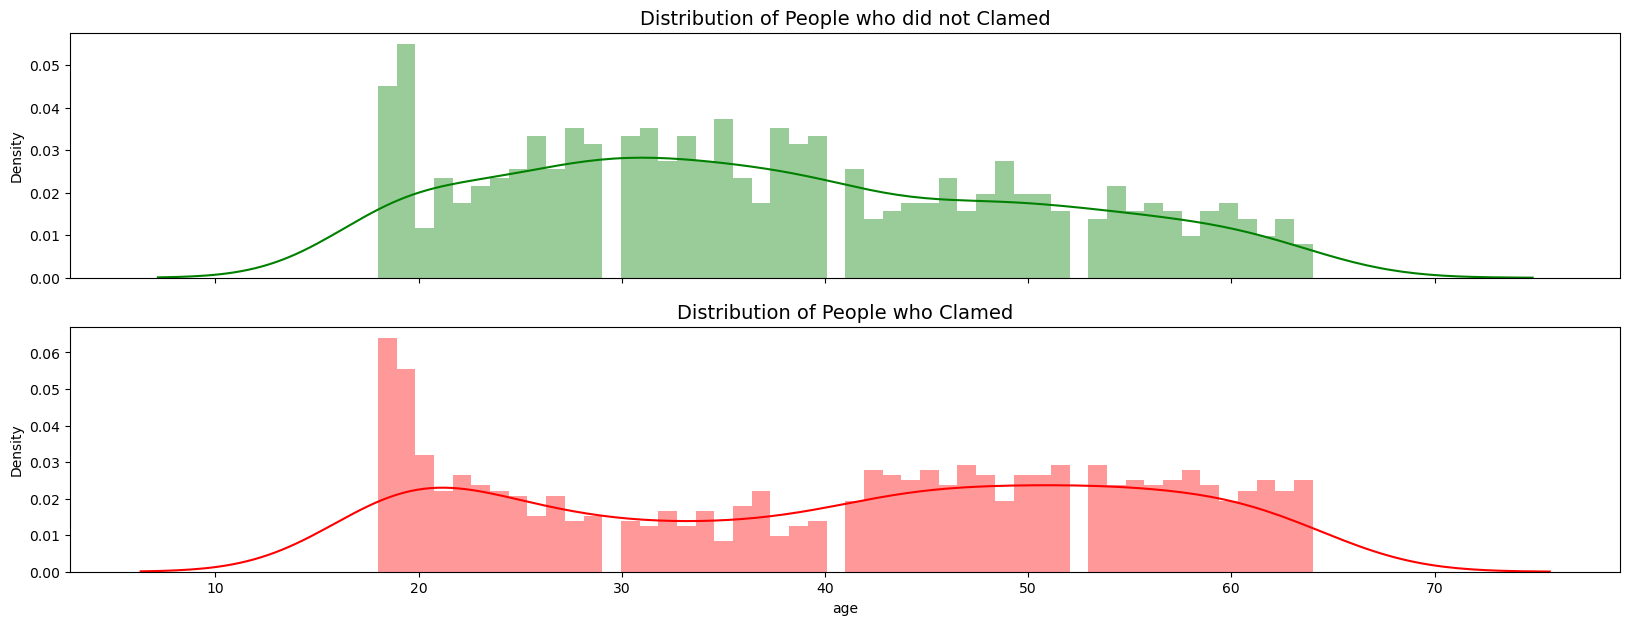

In [55]:
# Slicing data with non-clamed
Not_clamed = data['age'][data['insuranceclaim'] == 0]

# Slicing data with clamed
clamed = data['age'][data['insuranceclaim'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Not_clamed, bins = 50, ax = ax1, color = 'green')
ax1.set_title(label = 'Distribution of People who did not Clamed', size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = clamed, bins = 50, ax = ax2, color = 'red')
ax2.set_title(label = 'Distribution of People who Clamed', size = 14)
plt.show()

**Observation:**

- We can see that the distribution of both the cases are similar.

- If you notice the second graph you will see a little rise in the bar at the Age from 55-65 of the graphs.

##  Demonstrate an individual's insurance claim alongside the count of their dependents.

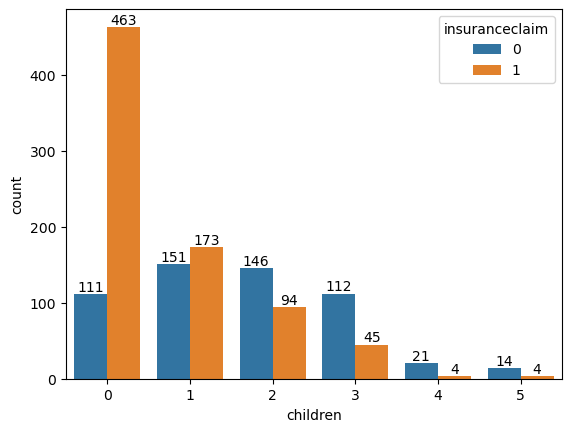

In [48]:
ax = sns.countplot(data = data, x = 'children', hue = 'insuranceclaim')

for bars in ax.containers:
    ax.bar_label(bars)

**Observation:**

- 
The distribution analysis uncovers a notable pattern wherein the dependent segment ranging from 0 to 1 shows a notably higher count compared to other dependent segments.



## Display a claim for personal insurance from an individual who is a smoker.

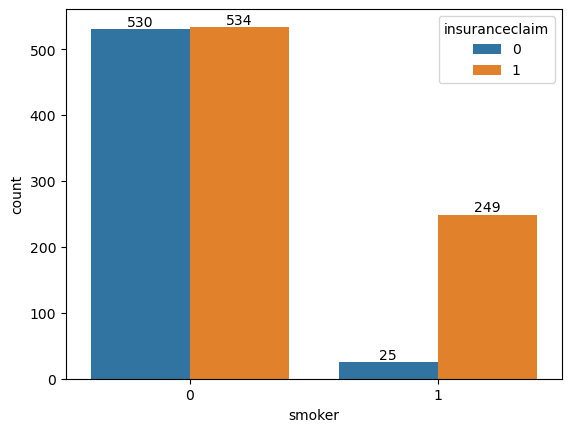

In [51]:
ay = sns.countplot(data = data, x = 'smoker', hue = 'insuranceclaim')

for bars in ay.containers:
    ay.bar_label(bars)

<a name = Section71></a>
###  Feature Selection**

- Here we will **visualize  the correlation** of input features **using Heatmap**.
- If we see a case of correlation we will **remove the highly correlated feature**.

Text(0.5, 1.0, 'Correlation between features')

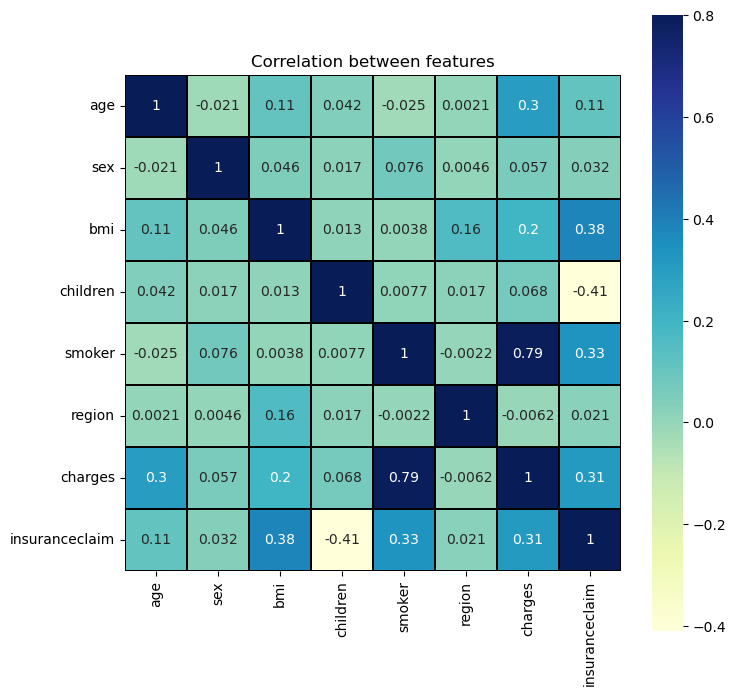

In [115]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

**Observation:** 

- Children are Insuranceclame are negatively corelated with Clam.
- Smoker and Charges are positively coorelated with clam.


<a name = Section74></a>
# **7. Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [64]:
x = data.drop('insuranceclaim',axis = 1)
y = data['insuranceclaim']

In [65]:
x.shape


(1338, 7)

In [66]:
y.shape

(1338,)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 123, stratify = y)

print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (1204, 7) (1204,)
Testing Data Shape: (134, 7) (134,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Score**.

<a name = Section81></a>

## ** Logistic Regression - Baseline Model**

In [68]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [69]:
logreg.classes_


array([0, 1], dtype=int64)

In [70]:
logreg.coef_

array([[ 9.74104000e-04, -9.44094018e-01,  1.71763343e-01,
        -1.31637620e+00,  2.37777955e+00,  1.42494174e-01,
         4.91435315e-05]])

In [71]:
logreg.intercept_

array([-4.00392273])

In [72]:
logreg.score(x_test,y_test)

0.8432835820895522

## Using Trained Model for Prediction

In [73]:
#predicting on train data
y_pred_train = logreg.predict(x_train)


In [74]:
#predicting on test data
y_pred_test = logreg.predict(x_test)

In [75]:
y_pred_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

## Model Evaluation On Test Data

In [78]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_test,y_pred_test))
confusion_matrix.index = ['Positive','Negative']
confusion_matrix.columns = ['Positive','Negative']
print(confusion_matrix)

          Positive  Negative
Positive        42        14
Negative         7        71


**Observations** 
- True Positive(TP) = 42
- True Negative(TN) = 71
- False Positive(FP) = 7
- False Negative(FN) = 14

## Model Evaluation On Train Data

In [82]:
confusion_matrix = pd.DataFrame(confusion_matrix(y_train,y_pred_train))
confusion_matrix.index = ['Positive','Negative']
confusion_matrix.columns = ['Positive','Negative']
print(confusion_matrix)

          Positive  Negative
Positive       378       121
Negative        92       613


### Checking Accuracy on test

In [83]:

logreg.score(x_test,y_test)

0.8432835820895522

In [84]:
print('Accuracy score for test data is:', logreg.score(x_test,y_test))

Accuracy score for test data is: 0.8432835820895522


In [85]:
### Checking Accuracy on train

In [86]:
accuracy_score(y_train,y_pred_train)

0.8230897009966778

## Classification Report

In [90]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        56
           1       0.84      0.91      0.87        78

    accuracy                           0.84       134
   macro avg       0.85      0.83      0.84       134
weighted avg       0.84      0.84      0.84       134



<a name = Section9></a>

---
# **9. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to Clames.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model With accuracy_score of 82%** now can **help us** in **identifying** who survived and who did not survive.